In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cleaning & Preprocessing

In [194]:
df = pd.read_csv('customer.csv')

In [195]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [196]:
#df.reset_index(drop=True)

In [197]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [198]:
for i in df.columns:
  if (i!='age') and (i!='day') and (i!='dur') and (i!='num_calls'):
    print(df[i].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [199]:
df.duplicated().sum()

6

In [200]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [201]:
df.shape

(45205, 11)

##categorical type columns

###job

In [202]:
df.job.value_counts()

job
blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [203]:
df.job.isna().sum(),df.job.dtypes

(0, dtype('O'))

###marital

In [204]:
df.marital.value_counts()

marital
married     27210
single      12788
divorced     5207
Name: count, dtype: int64

In [205]:
df.marital.isna().sum()

0

In [206]:
df.marital= df.marital.fillna('married') # fill mode for categorical data

In [207]:
df.marital.isna().sum(), df.marital.dtypes

(0, dtype('O'))

###education_qual

In [208]:
df.education_qual.value_counts()

education_qual
secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: count, dtype: int64

In [209]:
df.education_qual.isna().sum()

0

In [210]:
df.education_qual= df.education_qual.fillna('secondary')

In [211]:
df.education_qual.isna().sum(), df.education_qual.dtypes

(0, dtype('O'))

###call_type

In [212]:
df.call_type.value_counts()

call_type
cellular     29282
unknown      13017
telephone     2906
Name: count, dtype: int64

In [213]:
df.call_type.isna().sum()

0

In [214]:
df.call_type= df.call_type.fillna('secondary')

In [215]:
df.call_type.isna().sum(), df.call_type.dtypes

(0, dtype('O'))

###day

In [216]:
df.day.value_counts()

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

In [217]:
df.day.isna().sum()

0

In [218]:
df.day= df.day.fillna(20.0)

In [219]:
df.day.isna().sum(), df.day.dtypes

(0, dtype('int64'))

###month

In [220]:
df.mon.value_counts()

mon
may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [221]:
df.mon.isna().sum()

0

In [222]:
df.mon= df.mon.fillna('may')

In [223]:
df.mon.isna().sum(), df.mon.dtypes

(0, dtype('O'))

###target var - y

In [224]:
df.y.value_counts()

y
no     39916
yes     5289
Name: count, dtype: int64

In [225]:
df.y.isna().sum()

0

In [226]:
df.dropna(subset=['y'], inplace = True)

In [227]:
df.y.isna().sum(), df.y.dtypes

(0, dtype('O'))

###*prev_outcome*

In [228]:
df.prev_outcome.value_counts()

prev_outcome
unknown    36953
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [229]:
df.prev_outcome.isna().sum(),df.prev_outcome.dtypes

(0, dtype('O'))

##numerical columns


outliers detection & correction has been done only to numerical data since categorical data is well within a range as per data presented

###age

In [230]:
df.age.describe()

count    45205.000000
mean        40.937087
std         10.619130
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [231]:
df.age.isna().sum(),df.age.dtypes

(0, dtype('int64'))

####outlier detection & correction

In [232]:
q3 = df.age.quantile(0.75)
q1 = df.age.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.age = df.age.clip(lower_threshold, upper_threshold)

In [233]:
df.age.describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

In [234]:
df.age.dtypes

dtype('float64')

###dur

In [235]:
df.dur.describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [236]:
df.dur.isna().sum(), df.dur.dtypes

(0, dtype('int64'))

####outlier

In [237]:
q3 = df.dur.quantile(0.75)
q1 = df.dur.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.dur = df.dur.clip(lower_threshold, upper_threshold)

In [238]:
df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

###num_calls

In [239]:
df.num_calls.describe()

count    45205.000000
mean         2.763898
std          3.098189
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [240]:
df.num_calls.isna().sum(),df.num_calls.dtypes

(0, dtype('int64'))

####outliers

In [241]:
q3 = df.num_calls.quantile(0.75)
q1 = df.num_calls.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.num_calls = df.num_calls.clip(lower_threshold, upper_threshold)

In [242]:
df.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

#EDA

In [243]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [244]:
# #plot for categorical features
# for i in df.columns:
#   if i != 'dur':
#     plt.figure(figsize = (20,5))
#     sns.countplot(x=df[i])
#     plt.title(f"Count Plot of {i}")
#     plt.show()

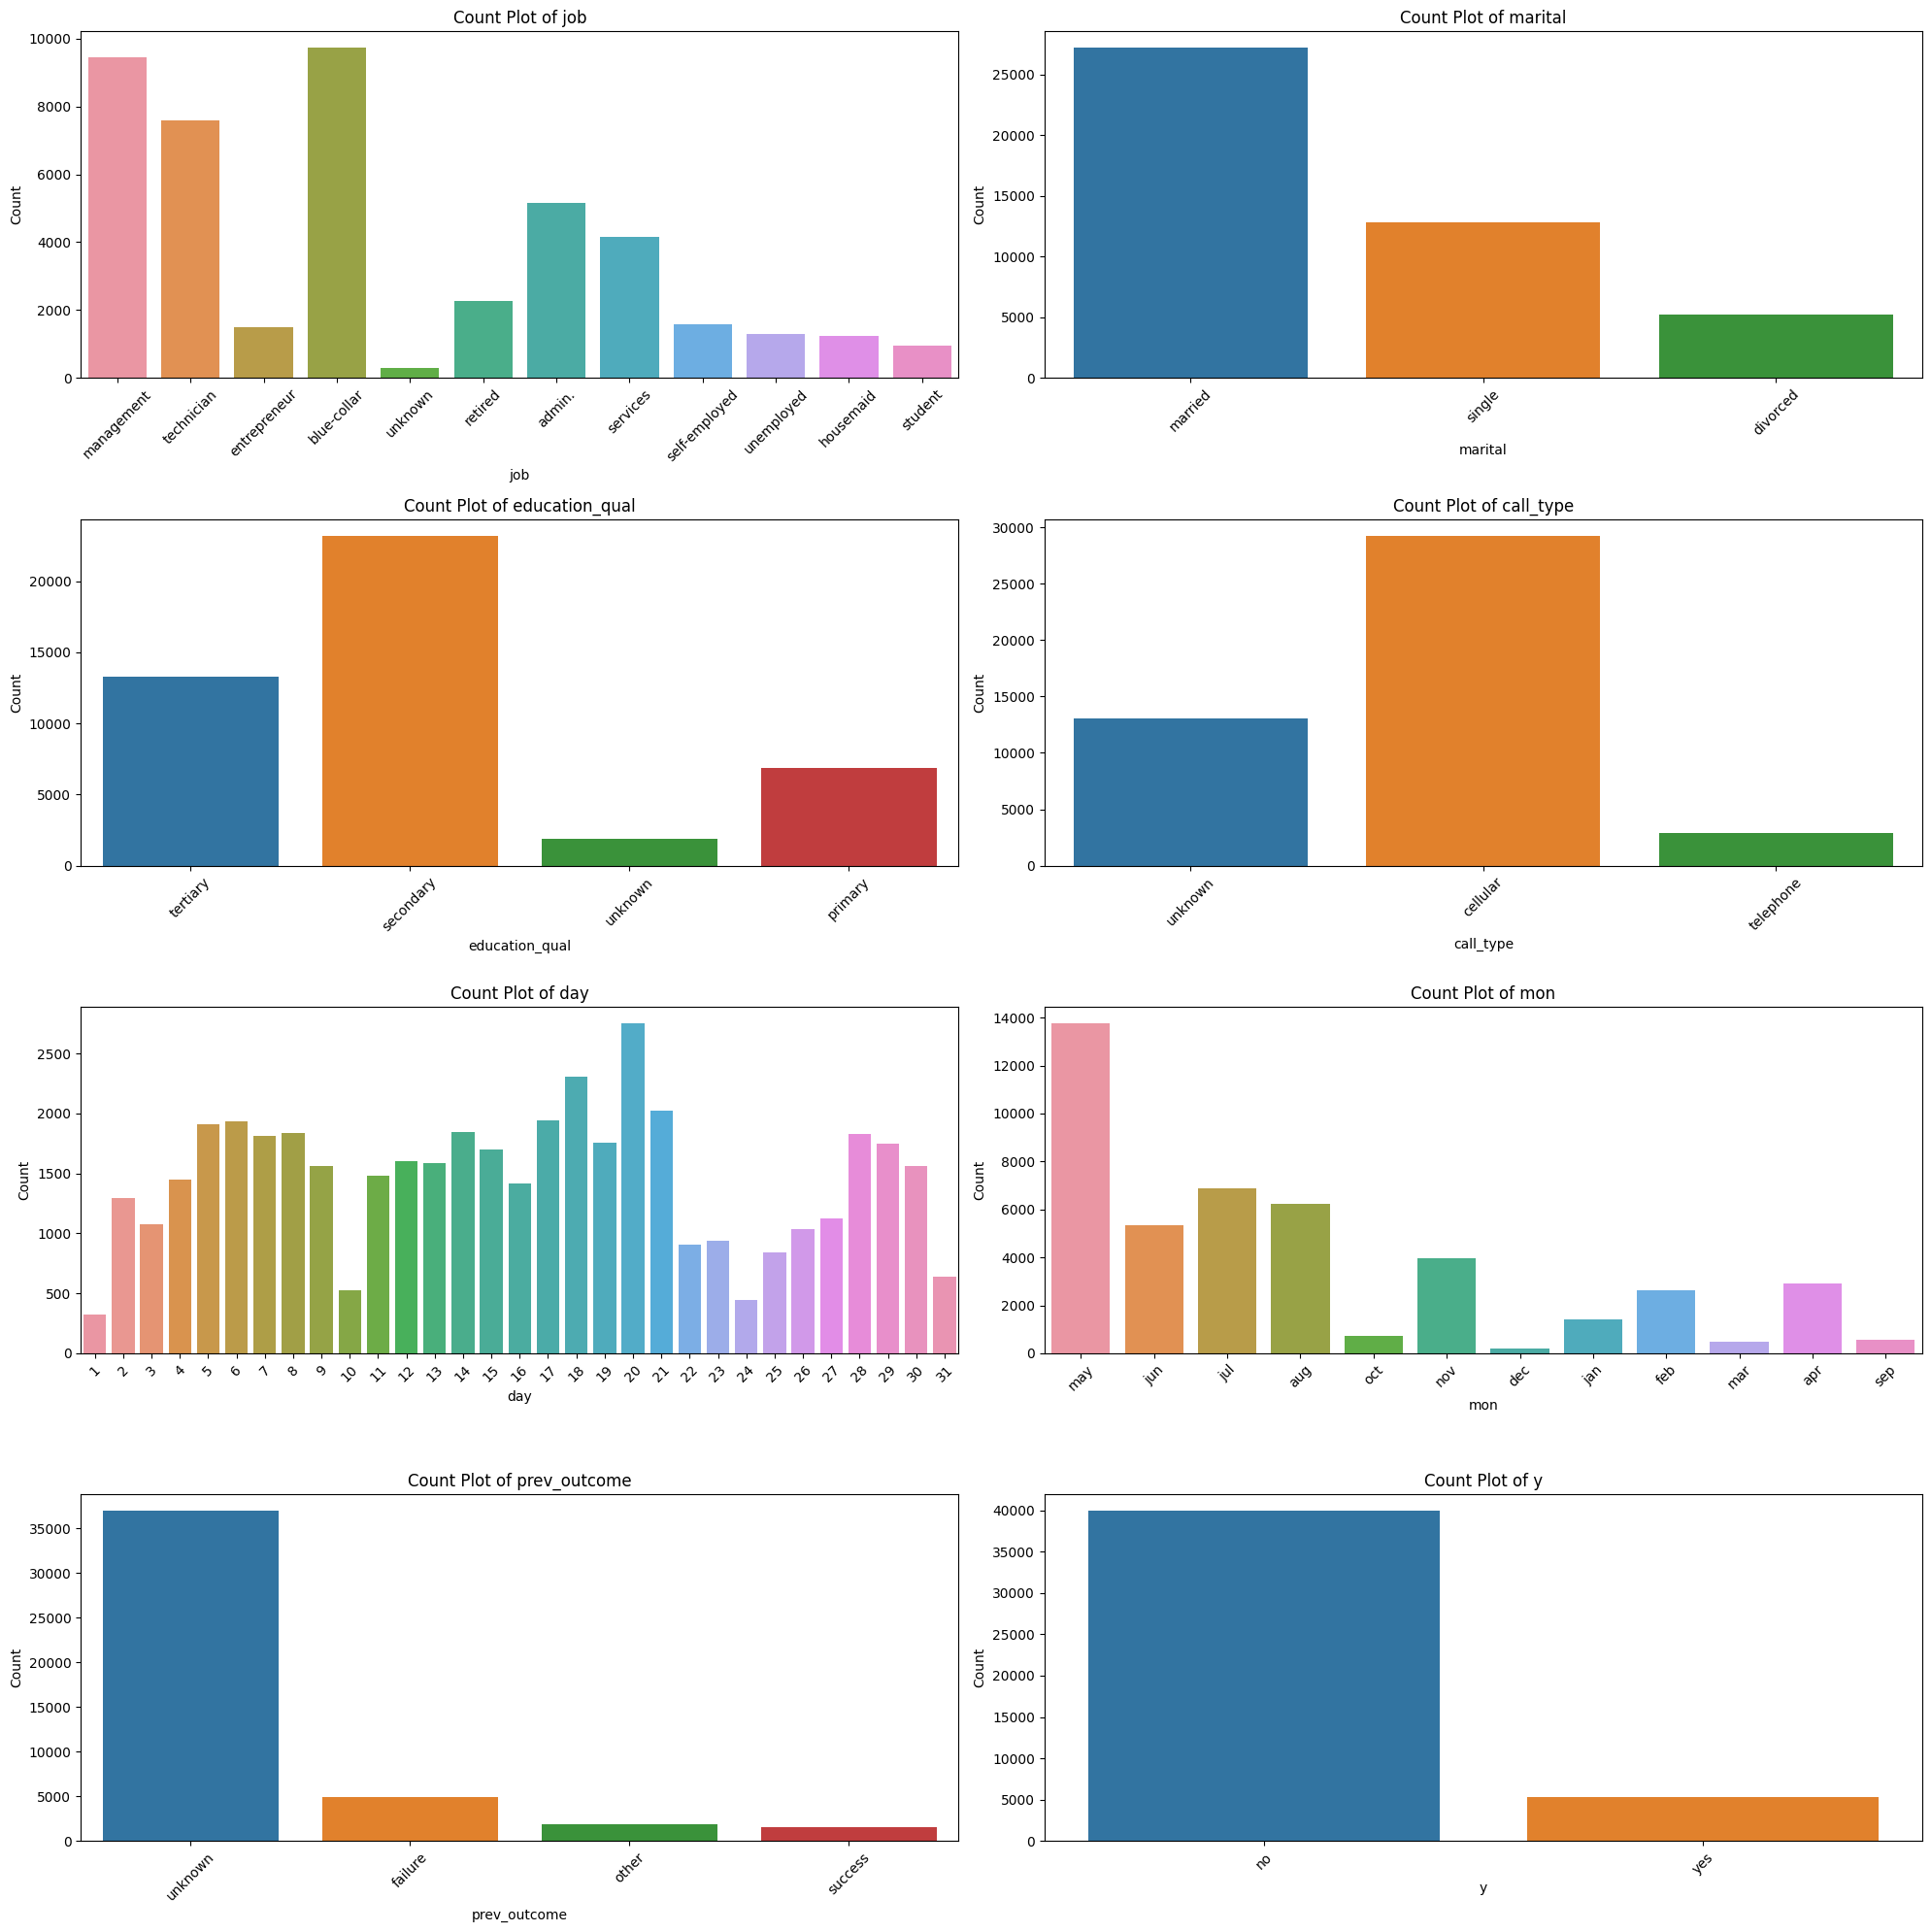

In [245]:
# Selecting only the categorical features
categorical_features = [col for col in df.columns if col != 'dur' and col != 'age' and col != 'num_calls']

# Determine the number of rows and columns for the grid layout
num_rows = len(categorical_features) // 2 + len(categorical_features) % 2
num_cols = 2

# Create a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

# Loop through each categorical feature and plot the count plot
for idx, feature in enumerate(categorical_features):
    row = idx // num_cols
    col = idx % num_cols
    sns.countplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(f"Count Plot of {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Count")
    # Rotate x-axis labels by 45 degrees
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#The resulting count plots are arranged in a neatly presented grid, with two plots per row. The plt.tight_layout() function is used to adjust the spacing between subplots to make the visualization look clean and readable.

<function matplotlib.pyplot.show(close=None, block=None)>

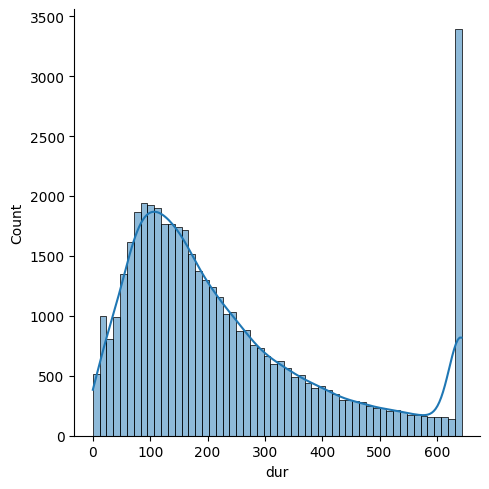

In [246]:
#visualizing distribution of numerical feature
sns.displot(x=df.dur, kind='hist',kde =True)
#sns.histplot(x=df.dur)
#plt.xlim(0,642)
plt.show
#since data from 643 is clipped there's a hike at that point

###observation on above plots:

####Targeted value of each feature
people between age '30-35'(might be because of income & repay capability), working as 'blue-collar' & 'management', qualified with 'secondary' education, preferring 'married' people, mostly cell-phoned, called around '20th' of every with 'May' being highest. Mostly called once with a duration of '100-200secs' & most of previous outcome is 'unknown'.Concluding "imbalanced" data with low number of people subscribing for insurance plans compared to number of rejects.



###job

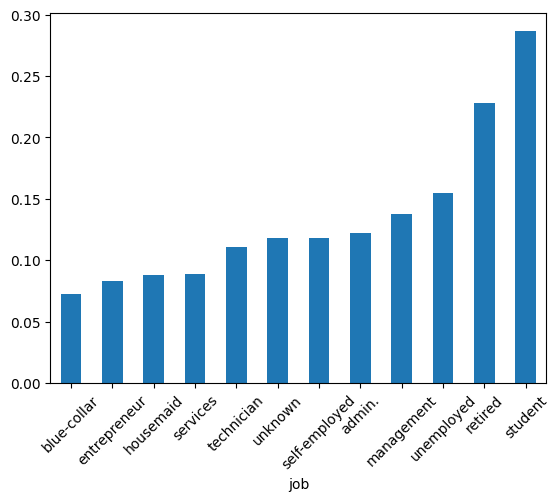

In [247]:
df['target'] = df.y.copy()
df.target = df.target.map({'yes' : 1, 'no':0})

job_mean = df.groupby('job')['target'].mean()
job_sorted = job_mean.sort_values()
job_sorted.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

Chances of subscribing to policy changes with job description. We keep the feature since it's important

###marital

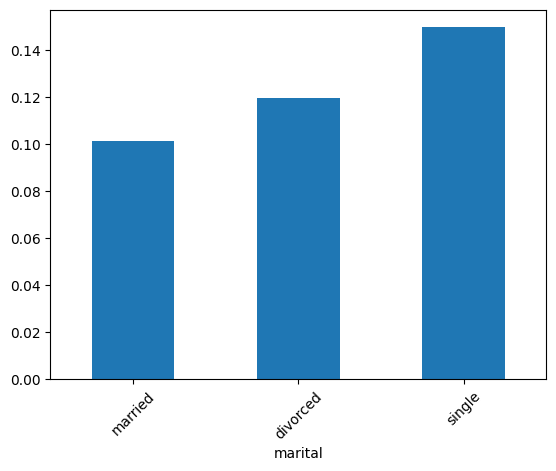

In [248]:
marital_mean = df.groupby('marital')['target'].mean()
marital_sorted = marital_mean.sort_values()
marital_sorted.plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

###education_qual

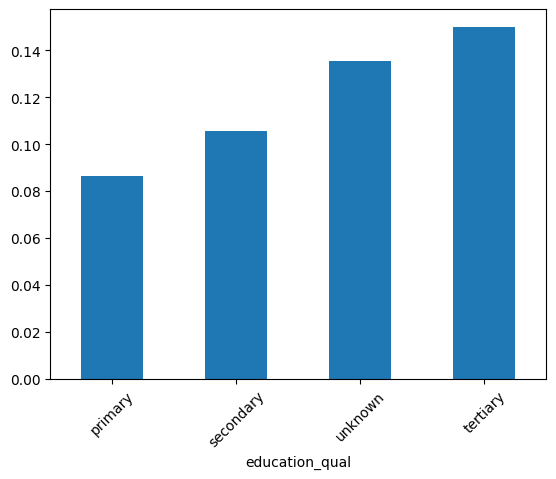

In [249]:
edu_mean = df.groupby('education_qual')['target'].mean()
edu_sorted = edu_mean.sort_values()
edu_sorted.plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

###call_type

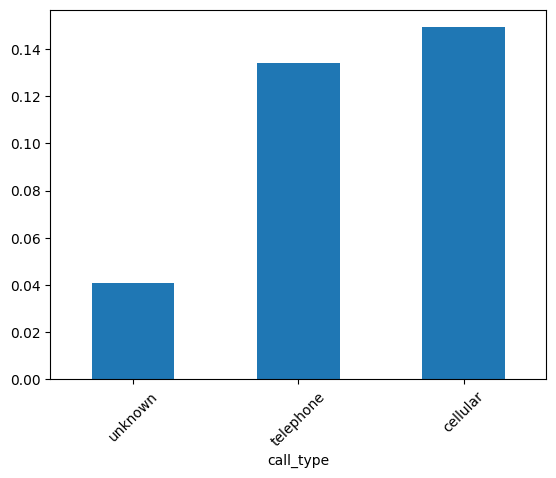

In [250]:
call_type_mean = df.groupby('call_type')['target'].mean()
call_type_sorted = call_type_mean.sort_values()
call_type_sorted.plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

###day

<Axes: xlabel='day'>

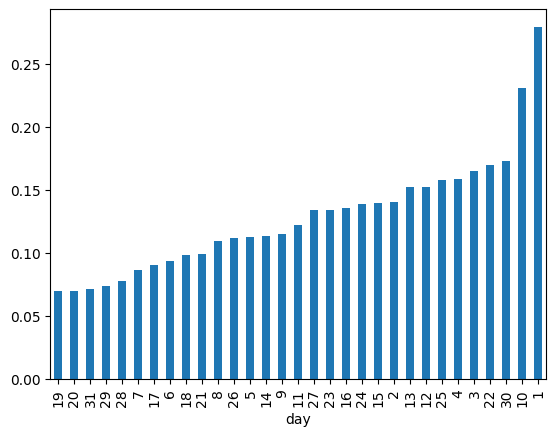

In [251]:
day_mean = df.groupby('day')['target'].mean()
day_sorted = day_mean.sort_values()
day_sorted.plot(kind='bar')

###mon

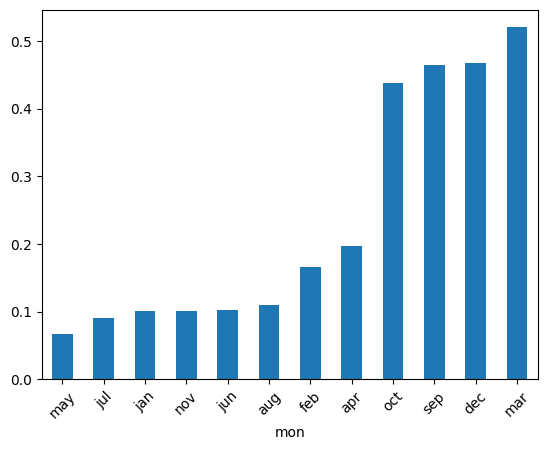

In [252]:
mon_mean = df.groupby('mon')['target'].mean()
mon_sorted = mon_mean.sort_values()
mon_sorted.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

###age

<Axes: xlabel='target', ylabel='age'>

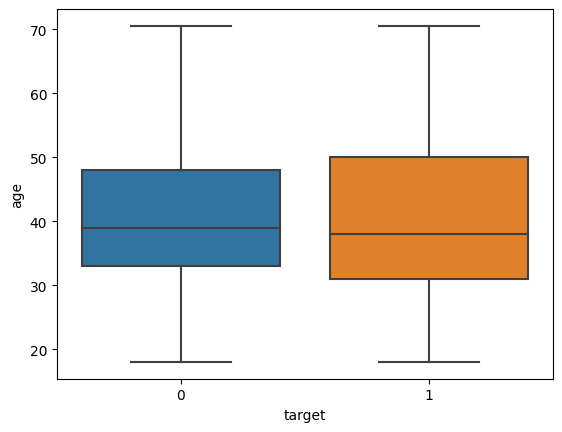

In [253]:
sns.boxplot(x = "target", y = 'age', data = df)

###dur

<Axes: xlabel='y', ylabel='dur'>

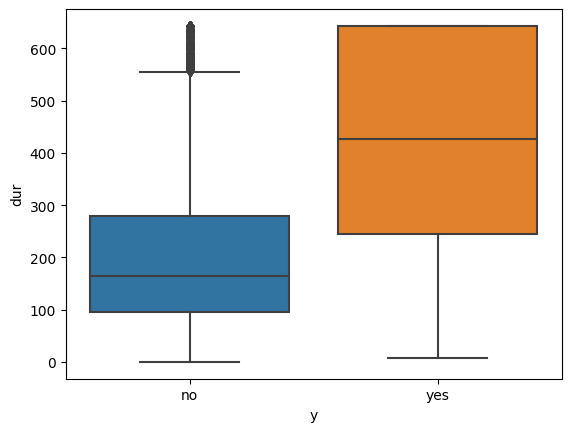

In [254]:
sns.boxplot(x = "y", y = 'dur', data = df)

###num_calls

<Axes: xlabel='y', ylabel='num_calls'>

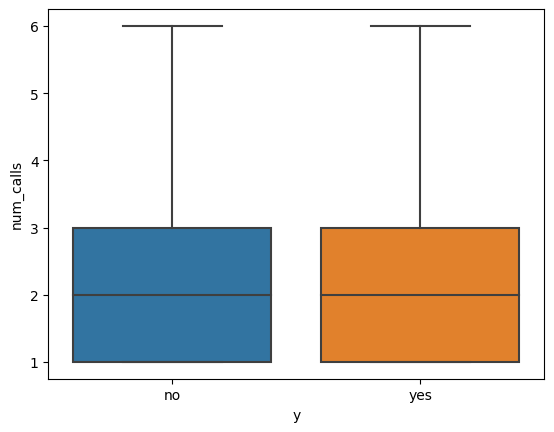

In [255]:
sns.boxplot(x = "y", y = 'num_calls', data = df)

chances of subscribing is not changing with number of calls => not important

In [256]:
del df['num_calls']

###prev_outcome

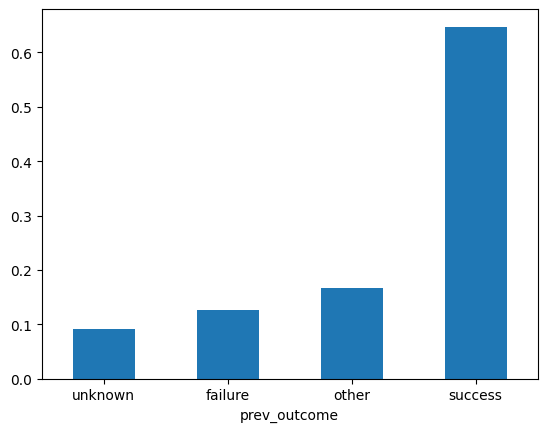

In [257]:
prev_mean = df.groupby('prev_outcome')['target'].mean()
prev_sorted = prev_mean.sort_values()
prev_sorted.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [258]:
#deleting target column since we have encode target
del df['y']

##Encoding

In [259]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'prev_outcome', 'target'],
      dtype='object')

In [260]:
for i in df.columns:
  if (i!='age') and (i!='day') and (i!='dur') and (i!='num_calls'):
    print(df[i].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
[0 1]


In [261]:
df.job = df.job.map({'management':8, 'technician':4, 'entrepreneur':1, 'blue-collar':0, 'unknown':5, 'retired':10, 'admin.':7, 'services':3, 'self-employed':6, 'unemployed':9, 'housemaid':2, 'student':11})
df.marital = df.marital.map({'married':0, 'single':2, 'divorced':1})
df.education_qual = df.education_qual.map({'tertiary':3, 'secondary':1, 'unknown':2, 'primary':0})
df.call_type = df.call_type.map({'unknown':0, 'cellular':2, 'telephone':1})
df.mon = df.mon.map({'may':0, 'jun':4, 'jul':1, 'aug':5, 'oct':8, 'nov':3, 'dec':10, 'jan':2, 'feb':6, 'mar':11, 'apr':7, 'sep':9})
df.prev_outcome = df.prev_outcome.map({'unknown':0, 'failure':1, 'other':2, 'success':3})

In [262]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,prev_outcome,target
0,58.0,8,0,3,0,5,0,261,0,0
1,44.0,4,2,1,0,5,0,151,0,0
2,33.0,1,0,1,0,5,0,76,0,0
3,47.0,0,0,2,0,5,0,92,0,0
4,33.0,5,2,2,0,5,0,198,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,51.0,4,0,3,2,17,3,643,0,1
45207,70.5,10,1,0,2,17,3,456,0,1
45208,70.5,10,0,1,2,17,3,643,3,1
45209,57.0,0,0,1,1,17,3,508,0,0


###Split
Splitting data is a fundamental step in machine learning (ML) and is typically done to train, validate, and test ML models effectively

In [263]:
# Separate the features (X) and target variable (y)
y = df.target
X = df.drop(columns = ['target'])

In [264]:
!pip install scikit-learn

In [265]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% for training, 20% for testing)
# You can adjust the 'test_size' parameter to control the size of the testing set.
# 'random_state' is used to ensure reproducibility of the same split if needed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

###Balanced data or not

In [266]:
#This division calculates the proportion of each class by dividing the count of occurrences of each class by the total number of samples. The result is a Series containing the relative frequency of each class in the training set.
y_train.value_counts()/y_train.shape[0]

target
0    0.883779
1    0.116221
Name: count, dtype: float64

In [267]:
!pip install imblearn

In [268]:
# def plot_2d(X, y, label='Classes'):
#     #colors = ['#1F77B4', '#FF7F0E']
#     colors = ['blue', 'orange']
#     markers = ['o', 's']
#     for l, c, m in zip(np.unique(y), colors, markers):
#         plt.scatter(
#             X[y==l, 0],
#             X[y==l, 1],
#             c=c, label=l, marker=m
#         )
#     plt.title(label)
#     plt.legend(loc='upper right')
#     plt.show()

In [269]:
from imblearn.combine import SMOTEENN

# # Plot the original data in a 2D space
# plot_2d(X, y, 'Original Data')

# Initialize the SMOTEENN object with 'sampling_strategy' set to 'all'
smt = SMOTEENN(sampling_strategy='all')

# Apply SMOTEENN to resample the training data and balance class distribution
X_smt, y_smt = smt.fit_resample(X_train, y_train)

# # Plot the resampled data after applying SMOTEENN
# plot_2d(X_smt, y_smt, 'SMOTE + ENN links')



In [270]:
X_smt.shape, y_smt.shape

((54749, 9), (54749,))

###Scaling

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_smt)

X_train_scaled = scaler.transform(X_smt)
X_test_scaled = scaler.transform(X_test)

In [272]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8
count,5.474900e+04,5.474900e+04,5.474900e+04,5.474900e+04,5.474900e+04,5.474900e+04,5.474900e+04,5.474900e+04,5.474900e+04
mean,-6.248997e-17,1.204376e-16,1.323775e-17,1.116124e-16,5.398926e-17,-2.284161e-17,1.661208e-17,-6.644832e-17,4.568322e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.026177e+00,-1.520771e+00,-7.630227e-01,-1.417789e+00,-1.813165e+00,-1.728120e+00,-1.154960e+00,-1.497534e+00,-4.969155e-01
25%,-7.935414e-01,-6.096699e-01,-7.630227e-01,-4.390781e-01,-5.819067e-01,-8.863538e-01,-1.154960e+00,-8.493192e-01,-4.969155e-01
50%,-2.233088e-01,-2.268782e-03,-7.630227e-01,-4.390781e-01,6.493517e-01,-4.458752e-02,-1.003048e-01,-2.821314e-01,-4.969155e-01
75%,7.032300e-01,9.088328e-01,1.578348e+00,5.396324e-01,6.493517e-01,6.769264e-01,6.027985e-01,9.332710e-01,-4.969155e-01
max,2.596206e+00,1.819934e+00,1.578348e+00,1.518343e+00,6.493517e-01,1.879450e+00,2.712109e+00,1.567187e+00,3.216150e+00


###ML Modelling

####Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_smt)
#The predicted target values (y_pred) is compared with the true target labels of the testing data (y_test) to assess the performance of the logistic regression model on unseen data.
f'Test data accuracy is : {lr.score(X_test_scaled, y_test)}, {f1_score(y_test, lr.predict(X_test_scaled))} '

'Test data accuracy is : 0.7447185045902002, 0.4571966133584195 '

####KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

for k in [1,2,3,4,5,6,7,8,9,10,12,15,16,17,18,20,50]:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train_scaled, y_smt)
  train_score = knn.score(X_train_scaled, y_smt)
  knn = KNeighborsClassifier(k)
  cross_val_result = np.mean(cross_val_score(knn, X_train_scaled, y_smt, cv = 10))
  print(f'K : {k}, training score : {train_score} and cross-val score : {cross_val_result}')


K : 1, training score : 1.0 and cross-val score : 0.9424373320561721
K : 2, training score : 0.9832822309826252 and cross-val score : 0.9330383394860003
K : 3, training score : 0.9660716892977077 and cross-val score : 0.9358120521220373
K : 4, training score : 0.9630968024529128 and cross-val score : 0.9313224348308005
K : 5, training score : 0.9537888742882172 and cross-val score : 0.9300995173342678
K : 6, training score : 0.9507227332457293 and cross-val score : 0.9278364438606331
K : 7, training score : 0.9460322674843042 and cross-val score : 0.92754432318221
K : 8, training score : 0.9435866549861294 and cross-val score : 0.925993048441095
K : 9, training score : 0.9413965542414952 and cross-val score : 0.9252082070493444
K : 10, training score : 0.9387501825083954 and cross-val score : 0.9234013512775388


KeyboardInterrupt: 

In [181]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {knn.score(X_test_scaled, y_test)}, {f1_score(y_test, knn.predict(X_test_scaled))} '

'Test data accuracy is : 0.8208162813848026, 0.5051924251679902 '

####Decision Tree

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,15,20,25,30,33,34,35,36,37,38,39,40,45,50]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(X_train_scaled, y_smt)
  train_score = dt.score(X_train_scaled, y_smt)
  dt = DecisionTreeClassifier(max_depth = depth)
  cross_val_result = np.mean(cross_val_score(dt, X_train_scaled, y_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 30, training score : 1.0 and cross-val score : 0.9507414640904954
Depth : 33, training score : 1.0 and cross-val score : 0.9509239858091213
Depth : 34, training score : 1.0 and cross-val score : 0.9505407208412212
Depth : 35, training score : 1.0 and cross-val score : 0.9499384744405648
Depth : 36, training score : 1.0 and cross-val score : 0.9507049810623975
Depth : 37, training score : 1.0 and cross-val score : 0.9507779737631277
Depth : 38, training score : 1.0 and cross-val score : 0.9503399176417455
Depth : 39, training score : 1.0 and cross-val score : 0.9508875027810234
Depth : 40, training score : 1.0 and cross-val score : 0.9506137135419512
Depth : 45, training score : 1.0 and cross-val score : 0.9506867228955148
Depth : 50, training score : 1.0 and cross-val score : 0.9508692279613069


In [187]:
dt = DecisionTreeClassifier(max_depth = 39)
dt.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {dt.score(X_test_scaled, y_test)}, {f1_score(y_test, dt.predict(X_test_scaled))} '

'Test data accuracy is : 0.8272315009401615, 0.5158090514569126 '

####Voting Classifier

In [188]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators = [('logistic_regression', lr),('k-nn', knn),('decision-tree', dt)])
model.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {model.score(X_test_scaled, y_test)}, {f1_score(y_test, model.predict(X_test_scaled))} '

'Test data accuracy is : 0.8020130516535782, 0.517780172413793 '

####Random Forest Classifier

In [189]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,20]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(X_train_scaled, y_smt)
  train_score = rf.score(X_train_scaled, y_smt)
  cross_val_result = np.mean(cross_val_score(rf, X_train_scaled, y_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.798784494086728 and cross-val score : 0.8021606152489331
Depth : 2, training score : 0.8576434515987735 and cross-val score : 0.8535732151825883
Depth : 3, training score : 0.8747444882464593 and cross-val score : 0.8649798900380086
Depth : 4, training score : 0.8803474959848153 and cross-val score : 0.8786133518424031
Depth : 5, training score : 0.8917542706964521 and cross-val score : 0.8898012351073709
Depth : 6, training score : 0.8996203825375967 and cross-val score : 0.8987625079434016
Depth : 7, training score : 0.9102058694699956 and cross-val score : 0.9080704128437309
Depth : 8, training score : 0.92177690173748 and cross-val score : 0.917542551320703
Depth : 9, training score : 0.9314133450138706 and cross-val score : 0.9244961518631858
Depth : 10, training score : 0.9376916338151555 and cross-val score : 0.9312307043615771
Depth : 12, training score : 0.9569827712074755 and cross-val score : 0.9426375557370343
Depth : 13, training score : 0.965

In [191]:
rf = RandomForestClassifier(max_depth = 20)
rf.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {rf.score(X_test_scaled, y_test)}, {f1_score(y_test, rf.predict(X_test_scaled))} '

'Test data accuracy is : 0.8408361906868709, 0.5638072143073658 '

#### XG Boost

In [169]:
!pip install xgboost

In [176]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2,0.5,0.6,0.7,0.8, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(X_train_scaled, y_smt)
  train_score = xg.score(X_train_scaled, y_smt)
  cross_val_result = np.mean(cross_val_score(xg, X_train_scaled, y_smt, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.5, training score : 0.9908380785516133 and cross-val score : 0.9691398111968326
Learning Rate : 0.6, training score : 0.9936487078405607 and cross-val score : 0.9693222729652569
Learning Rate : 0.7, training score : 0.994926266608264 and cross-val score : 0.9691397812217317
Learning Rate : 0.8, training score : 0.9970433639947438 and cross-val score : 0.9698880729740497
Learning Rate : 1, training score : 0.9986494378741422 and cross-val score : 0.9689937658451713


In [178]:
from sklearn.metrics import f1_score

xg = xgb.XGBClassifier(learning_rate=0.8)
xg.fit(X_train_scaled, y_smt)
f'Test data accuracy is : {xg.score(X_test_scaled, y_test)}, {f1_score(y_test, xg.predict(X_test_scaled))} '

'Test data accuracy is : 0.8649485676363234, 0.5828493337888624 '

####Feature importance

In [88]:
f_imp_list = list(zip(X.columns, xg.feature_importances_))
f_imp_df = pd.DataFrame(f_imp_list,columns = ['Features', 'Importance'])
f_imp_df.sort_values('Importance',ascending = False, inplace = True)
f_imp_df

,Features,Importance
8,prev_outcome,0.313711
7,dur,0.255814
4,call_type,0.126140
6,mon,0.119426
5,day,0.045075
1,job,0.041672
0,age,0.035306
2,marital,0.034243
3,education_qual,0.028612


In [192]:
import xgboost as xgb
import pandas as pd
import pickle

# Assuming you have trained and saved your XGBoost model as 'xgboost_model.pkl'
model = xgb.XGBClassifier()
model.fit(X_train_scaled, y_smt)  # Replace X_train and y_smt with your training data
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump({'model': model, 'scaler': scaler}, f)


In [ ]:
# model = xgb.XGBClassifier()
# model.fit(X_train_scaled, y_smt)
# with open('xgboost_model.pkl', 'wb') as f:
#     pickle.dump({'model': model, 'scaler': scaler}, f)